✅ TensorFlow version: 2.20.0

📂 Loading CIFAR-10 dataset from: ./data/cifar10_data.npz
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)

🚀 Training MLP...


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3117 - loss: 1.9807 - val_accuracy: 0.3793 - val_loss: 1.7718
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3861 - loss: 1.7344 - val_accuracy: 0.4105 - val_loss: 1.6740
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4132 - loss: 1.6622 - val_accuracy: 0.4322 - val_loss: 1.6107
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4307 - loss: 1.6087 - val_accuracy: 0.4406 - val_loss: 1.5825
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4474 - loss: 1.5652 - val_accuracy: 0.4448 - val_loss: 1.5667
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4550 - loss: 1.5383 - val_accuracy: 0.4518 - val_loss: 1.5468
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4671 - loss: 1.5096 - val_accuracy: 0.4665 - val_loss: 1.5139
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4720 - loss: 1.4888 - val_ac

C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🚀 Training CNN...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.4826 - loss: 1.4511 - val_accuracy: 0.5689 - val_loss: 1.2399
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.6239 - loss: 1.0733 - val_accuracy: 0.6424 - val_loss: 1.0210
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6724 - loss: 0.9373 - val_accuracy: 0.6548 - val_loss: 0.9972
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7071 - loss: 0.8403 - val_accuracy: 0.6876 - val_loss: 0.9070
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7366 - loss: 0.7607 - val_accuracy: 0.7076 - val_loss: 0.8519
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7600 - loss: 0.6880 - val_accuracy: 0.7034 - val_loss: 0.8642
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7859 - loss: 0.6182 - val_accuracy: 0.7112 - val_loss: 0.8652
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.808

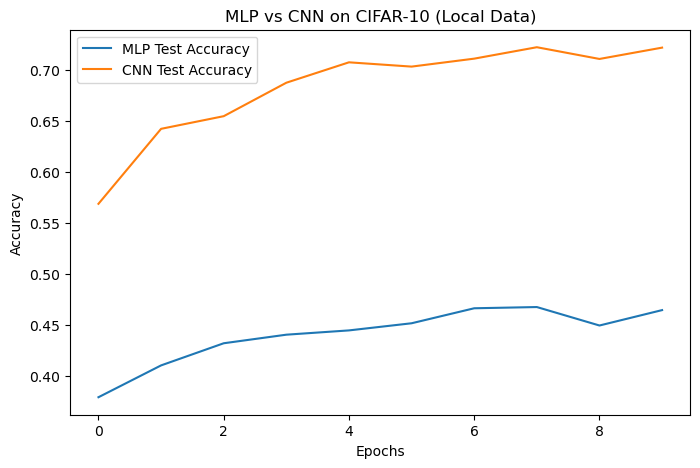


✅ Final MLP Test Accuracy: 46.47%
✅ Final CNN Test Accuracy: 72.20%
📂 Dataset loaded from: C:\Users\Siddhant Gite\Untitled Folder\data\cifar10_data.npz


In [1]:
# ------------------------------------------------------------
# CIFAR-10 Neural Network Comparison (TensorFlow + Local Dataset)
# ------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Load CIFAR-10 Dataset from Local File (Jupyter Folder)
# ------------------------------------------------------------
data_path = "./data/cifar10_data.npz"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"❌ Dataset not found at {data_path}. Please ensure cifar10_data.npz exists in the data folder.")

print(f"\n📂 Loading CIFAR-10 dataset from: {data_path}")
data = np.load(data_path)
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# ------------------------------------------------------------
# Step 2: Define MLP Model
# ------------------------------------------------------------
def create_mlp():
    model = keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------------------------------------
# Step 3: Define CNN Model
# ------------------------------------------------------------
def create_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------------------------------------
# Step 4: Train and Evaluate Models
# ------------------------------------------------------------
num_epochs = 10
batch_size = 128

mlp = create_mlp()
print("\n🚀 Training MLP...")
mlp_history = mlp.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_test, y_test), verbose=1)

cnn = create_cnn()
print("\n🚀 Training CNN...")
cnn_history = cnn.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                      validation_data=(X_test, y_test), verbose=1)

# ------------------------------------------------------------
# Step 5: Plot Accuracy Comparison
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(mlp_history.history['val_accuracy'], label='MLP Test Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP vs CNN on CIFAR-10 (Local Data)")
plt.legend()
plt.show()

# ------------------------------------------------------------
# Step 6: Final Evaluation
# ------------------------------------------------------------
mlp_test_loss, mlp_test_acc = mlp.evaluate(X_test, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final MLP Test Accuracy: {mlp_test_acc:.2%}")
print(f"✅ Final CNN Test Accuracy: {cnn_test_acc:.2%}")
print(f"📂 Dataset loaded from: {os.path.abspath(data_path)}")
